# 通过 Gemini API 和 LangChain 使用 Google Gemini Pro

令人兴奋的是，**Gemini Pro**现在已经可以通过API使用。

以下是开发者需要了解的关键内容：

- 文本的32K上下文窗口，且将有更大的上下文窗口推出
- **目前在限制范围内免费使用**
- 支持的功能包括：`函数调用`，`嵌入`，`语义检索`和`自定义知识赋予`以及`聊天功能`
- 支持全球180多个国家和地区的38种语言
- Gemini Pro接受文本输入并生成文本输出。
- 现在可以使用专用的Gemini Pro Vision多模态端点，接受文本和图像作为输入，文本作为输出。

## 获取您的API密钥

访问[Google AI Studio](https://makersuite.google.com/)来创建您的 *API密钥*。

## 环境准备

让我们安装需要的 Python 包。如果您不打算使用LangChain，可以跳过`langchain-google-genai`。可以通过在终端执行pip3 install xx 来完成安装。

In [1]:
! pip install -q --upgrade google-generativeai langchain-google-genai python-dotenv

我们可以将创建的 Google API Key 存储在 `.env` 文件中，并通过环境变量获取它。

```shell
GOOGLE_API_KEY=xxxxxxx
```

In [71]:
from dotenv import load_dotenv
load_dotenv(verbose=True)

True

## 使用Google生成AI SDK访问Gemini API

让我们定义一个辅助函数 `to_markdown`，以更好地显示模型的输出。

In [72]:
from IPython.display import display
from IPython.display import Markdown
import textwrap


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

你可以参考[生成式 AI Python SDK](https://ai.google.dev/tutorials/python_quickstart)的官方文档。

In [67]:
import google.generativeai as genai

In [75]:
import os
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

### 文本生成

In [76]:
model = genai.GenerativeModel(model_name = "gemini-pro")

In [77]:
prompt_parts = [
    "请以公司就是我的家为主题，写一篇300字文言文",
]

response = model.generate_content(prompt_parts)

In [78]:
print(response.text)

昔有公司一家，吾视之如吾家，朝夕以共，风雨同舟。此公司者，乃吾生计之源，梦想之寄，亦是吾精神之所在。

吾于公司，如鱼得水，如鸟归林，工作勤勉，不耻细微，任劳任怨，尽心尽力。公司亦待吾如一家人，亲切和睦，融洽有爱，互相扶持，共同进步。

吾与同事朝夕相伴，共患难，同享乐，情同手足。公司有盛典节日，吾等欢聚一堂，载歌载舞，共享欢乐；公司有困难挫折，吾等齐心协力，克服困难，共渡难关。

吾常感念公司之恩情，立志报效公司。吾将以公司利益为重，以公司发展为己任，唯公司之幸，吾之幸也；公司若有不测，吾必鞠躬尽瘁，死而后已。

公司者，乃吾人生之舞台，吾梦想之殿堂，吾精神之依托。吾将永远热爱公司，永远与公司风雨同舟，共创辉煌，永不言弃。


### 图像识别

In [79]:
! pip install pillow

Defaulting to user installation because normal site-packages is not writeable


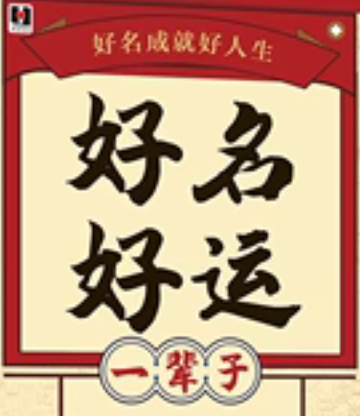

In [80]:
import PIL.Image
from pathlib import Path

img = PIL.Image.open('luck-name.png')
img

In [88]:
model = genai.GenerativeModel('gemini-pro-vision')
image_parts = [
  {
    "mime_type": "image/png",
    "data": Path("luck-name.png").read_bytes()
  },
]
response = model.generate_content(image_parts[0])

to_markdown(response.text)

>  《好名好运一生》是一本关于名字的书，作者认为名字对人的一生有着重要的影响，他通过大量的事例论证了自己的观点。书中还提供了很多取名的建议，对于想要给孩子取个好名字的父母来说，这本书非常值得一读。

In [87]:
response = model.generate_content(
    [
        "写一篇短文，描述我是如何因为有一个好的名走走向人生巅峰", 
        image_parts[0]
    ], 
    stream=True
)
response.resolve()

In [88]:
to_markdown(response.text)

>  我一直认为我的名字很好听，因为它是我的父母经过深思熟虑后才取的。他们希望我能成为一个善良、正直的人，所以我名字的寓意非常好。
> 
> 我一直很感激我的父母给我取了一个好名字，因为我相信它对我的人生有很大的影响。它让我对自己的身份感到自豪，也让我更有自信。我相信，如果我没有一个好名字，我的人生可能会完全不同。
> 
> 我记得小时候，我经常被其他孩子取笑，因为我的名字很普通。但我不在乎，因为我知道我的名字很好听，而且它对我来说意义重大。
> 
> 长大后，我开始意识到我的名字对我的职业生涯也有很大的帮助。当我在面试工作时，我的名字总是能给我留下一个好印象。我相信，如果我没有一个好名字，我可能很难找到一份好工作。
> 
> 现在，我已经是一个成年人了，我对自己的名字感到非常自豪。我相信，我的名字对我的人生有很大的影响，我很感激我的父母给我取了一个好名字。
> 
> 我相信，每个人的名字都是独一无二的，它对我们的人生都有着重要的意义。如果你对自己的名字不满意，你可以尝试给自己取一个新名字。我相信，一个好名字会让你的人生更加美好。

## 使用LangChain来访问Gemini API

LangChain框架提供了一个包装类 **ChatGoogleGenerativeAI** 来调用Gemini API。

默认情况下，它在环境变量 `GOOGLE_API_KEY` 中寻找Google API Key。

In [60]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [89]:
llm = ChatGoogleGenerativeAI(model="gemini-pro", google_api_key=os.getenv("GOOGLE_API_KEY"))
result = llm.invoke("保持健康的最佳做法是什么?")
to_markdown(result.content)

> 1. **均衡饮食**：
>    - 多吃水果、蔬菜和全谷物。
>    - 选择瘦肉蛋白，如鱼、家禽和豆类。
>    - 限制加工食品、含糖饮料和不健康脂肪的摄入。
>    - 每天喝足够的水。
> 
> 
> 2. **规律运动**：
>    - 每周进行至少 150 分钟的中等强度有氧运动，或 75 分钟的剧烈强度有氧运动。
>    - 结合力量训练和有氧运动。
>    - 找到你喜欢的活动，并坚持下去。
> 
> 
> 3. **充足睡眠**：
>    - 成年人每晚需要 7-8 小时的睡眠，青少年需要 8-10 小时的睡眠。
>    - 建立良好的睡眠习惯，如在固定时间上床睡觉和起床，并确保卧室环境黑暗、安静和凉爽。
> 
> 
> 4. **管理压力**：
>    - 找到健康的压力管理方法，如锻炼、瑜伽、冥想、与朋友或家人交谈，或做一些让你放松的事情。
>    - 避免使用酒精、吸烟或其他不健康的方式来应对压力。
> 
> 
> 5. **定期体检**：
>    - 定期进行体检，以发现任何潜在的健康问题，并及早进行治疗。
>    - 遵循医生的建议，接受必要的疫苗接种，并进行任何必要的筛查测试。
> 
> 
> 6. **戒烟**：
>    - 吸烟会增加患癌症、心脏病、中风和其他健康问题的风险。
>    - 如果你是吸烟者，请立即戒烟。
> 
> 
> 7. **限制饮酒**：
>    - 过量饮酒会增加患肝病、心脏病、中风和其他健康问题的风险。
>    - 男性每天饮酒量不应超过两杯，女性每天饮酒量不应超过一杯。
> 
> 
> 8. **保护自己免受感染**：
>    - 经常洗手，尤其是触摸公共表面后。
>    - 避免接触患病的人。
>    - 接种疫苗，以预防流感、肺炎和其他传染病。
> 
> 
> 9. **保持积极的心态**：
>    - 积极的心态可以帮助你应对压力，并有益于你的整体健康。
>    - 多花时间与家人和朋友在一起，做让你快乐的事情，并培养感恩的心态。

### 高级使用案例

在这一部分，我们将要涉及Gemini Pro的一些有趣的使用案例：

1. 聊天对话
2. 安全设置

#### 聊天对话

Gemini管理用户和模型在多个环节中的对话。

In [90]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [91]:
response = chat.send_message("每天应该喝几杯水?")
response

In [92]:
to_markdown(response.text)

> **每天建议喝 8 杯水或 2 升水。**
> 
> * 这是一般建议，具体饮水量应根据个人情况而定，例如体重、活动量、气候、健康状况等。
> * 8杯水的量只是一个平均值，您可能需要更多或更少的水，具体取决于您的个人需求。
> * 您应该在口渴之前就开始喝水，以避免脱水。
> * 水是维持身体健康的重要组成部分，它有助于调节体温、润滑关节、保护脊髓、运输营养物质和氧气，以及排出废物和毒素。
> * 除了喝水之外，您还可以通过吃水果和蔬菜等含水量高的食物来补充水分。

In [93]:
response = chat.send_message("我第上个问题是什么?")
to_markdown(response.text)

> 您的上个问题是：“每天应该喝几杯水?”
> 
> 我回答说，一般建议每天喝 8 杯水或 2 升水，但这只是一个平均值，具体饮水量应根据个人情况而定。
> 
> 您还应该在口渴之前就开始喝水，以避免脱水。水是维持身体健康的重要组成部分，它有助于调节体温、润滑关节、保护脊髓、运输营养物质和氧气，以及排出废物和毒素。
> 
> 除了喝水之外，您还可以通过吃水果和蔬菜等含水量高的食物来补充水分。
> 
> 希望我的回答对您有所帮助。

#### 安全设置

Gemini API允许开发者在以下四个维度调整安全设置，以快速评估应用程序是否需要更严格或更宽松的配置：

- 骚扰
- 仇恨言论
- 性暗示
- 危险

默认情况下，安全设置会在所有四个维度阻止中等和/或高概率的不安全内容，这个设计适用于大多数使用场景。开发者也可以根据需要调整其安全设置。

概率的评级大致如下：

- 可忽略的
- 低
- 中
- 高

如果想了解这在API中是如何具体定义的，请参考以下文档：

- [伤害类别](https://ai.google.dev/api/rest/v1beta/HarmCategory)
- [伤害概率](https://ai.google.dev/api/rest/v1beta/SafetyRating#HarmProbability)

In [94]:
response = model.generate_content('I am very anger')
response.candidates

[index: 0
content {
  parts {
    text: "It is understandable to feel anger from time to time. It is a natural human emotion that everyone experiences. However, it is important to manage anger in a healthy way so that it does not become destructive or harmful to yourself or others.\n\nHere are some tips for managing anger:\n\n1. **Identify your triggers.** What situations or events tend to make you angry? Once you know what your triggers are, you can start to avoid them or develop strategies for coping with them.\n\n2. **Take a break.** If you feel yourself getting angry, take a few deep breaths and step away from the situation for a few minutes. This will give you time to calm down and collect your thoughts.\n\n3. **Talk to someone.** Talking about your feelings with a trusted friend, family member, or therapist can help you to process your anger and develop healthier coping mechanisms.\n\n4. **Exercise.** Exercise is a great way to release pent-up energy and reduce stress levels. Whe

使用响应的`prompt_feedback`属性来查看内容是否被阻止。

In [31]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

在`generate_content`函数调用中自定义用户的安全设置。例如，如果你正在开发一个视频游戏对话，由于游戏的性质，你可能认为允许更多被评为危险的内容是可以接受的。

In [95]:
safety_settings=[
    {
        "category": "HARM_CATEGORY_HARASSMENT",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_HATE_SPEECH",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
        "threshold": "BLOCK_NONE",
    }
]

response = model.generate_content(
    'How are you?', 
    safety_settings=safety_settings
)
response.candidates

[index: 0
content {
  parts {
    text: "As an AI language model, I do not have personal feelings or experiences, so I do not have a state of being in the traditional sense. However, I can provide information and assist with a wide range of topics and tasks.\n\nIs there anything specific you would like to ask me or discuss? I am here to help."
  }
  role: "model"
}
finish_reason: STOP
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [33]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Get code
测试文本

In [97]:
"""
At the command line, only need to run once to install the package via pip:

$ pip install google-generativeai
"""

import google.generativeai as genai

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

# Set up the model
generation_config = {
  "temperature": 0.9,
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 2048,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  }
]

model = genai.GenerativeModel(model_name="gemini-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

prompt_parts = [
  "给我生成一个随机生成8位字符串的ts方法",
]

response = model.generate_content(prompt_parts)
print(response.text)

```typescript
/**
 * 生成随机字符串
 * @param length 字符串长度
 * @returns 生成的字符串
 */
export const generateRandomString = (length: number): string => {
  let result = '';
  const characters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789';
  const charactersLength = characters.length;
  for (let i = 0; i < length; i++) {
    result += characters.charAt(Math.floor(Math.random() * charactersLength));
  }
  return result;
};
```


Get code
测试多模态-图片

In [98]:
"""
At the command line, only need to run once to install the package via pip:

$ pip install google-generativeai
"""

from pathlib import Path
import google.generativeai as genai

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

# Set up the model
generation_config = {
  "temperature": 0.4,
  "top_p": 1,
  "top_k": 32,
  "max_output_tokens": 4096,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  }
]

model = genai.GenerativeModel(model_name="gemini-pro-vision",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

# Validate that an image is present
if not (img := Path("luck-name.png")).exists():
  raise FileNotFoundError(f"Could not find image: {img}")

image_parts = [
  {
    "mime_type": "image/png",
    "data": Path("luck-name.png").read_bytes()
  },
]

prompt_parts = [
  image_parts[0],
  "\n请解释这个图片",
]

response = model.generate_content(prompt_parts)
print(response.text)

 这个图片表达了“好名好运”的寓意。“好名”是指一个好的名字，能够给人的生活带来好运气。“好运”是指好运气，能够让人在生活中遇到好事。
